In [3]:
import numpy as np
import os
os.chdir('/axp/rim/mldsml/dev/Shaique/ProbR/GBM/Adhoc/Cermati2')
os.getcwd()
import pandas as pd
#from datetime import datetime
import numpy as np 

In [4]:
#lets take a look at the training data

In [22]:
train_app =pd.read_csv("app_train.csv")

In [23]:
train_app.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [24]:
train_app.shape

(61503, 24)

In [25]:
train_app.LN_ID.nunique()

61503

In [ ]:
#we see that the data is at the LN_ID level,So our first approach will be to look at the otehr data sets and see at what level is that data available


In [8]:
prev_app.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0


# using prevpants and prev_app data 

In [11]:
install_payments = pd.read_csv("installment_payment.csv")

In [21]:
install_payments.head(10)

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
1080303,6339518,1000020,299072,1,-1986.0,-2000.0,18393.165,18393.165
1295003,7609974,1000020,299072,2,-1956.0,-1973.0,18393.165,18393.165
951302,5575255,1000020,299072,3,-1926.0,-1941.0,18393.165,18393.165
1039007,6094629,1000020,299072,4,-1896.0,-1912.0,18393.165,18393.165
1059023,6213282,1000020,299072,5,-1866.0,-1882.0,18393.165,18393.165
890116,5213452,1000020,299072,6,-1836.0,-1849.0,18393.165,18393.165
1168017,6858015,1000020,299072,7,-1806.0,-1818.0,18393.165,18393.165
1168323,6859937,1000020,299072,8,-1776.0,-1790.0,18393.165,18393.165
1191857,6999870,1000020,299072,9,-1746.0,-1759.0,18393.165,18393.165
1177594,6914447,1000020,299072,10,-1716.0,-1724.0,18393.165,18393.165


In [13]:
install_payments.shape

(2872306, 8)

In [14]:
install_payments.SK_ID_PREV.nunique()

211734

In [15]:
install_payments.LN_ID.nunique()

72301

In [19]:
install_payments.sort_values(by=["SK_ID_PREV","INST_NUMBER"],inplace=True)

In [67]:
install_payments.tail()

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY,diff
1668031,9804814,2843498,393881,2,-1412.0,-1424.0,16191.990,16191.990,0.0
1368805,8043906,2843498,393881,3,-1382.0,-1395.0,16191.990,16191.990,0.0
1907167,11215246,2843498,393881,4,-1352.0,-1367.0,16191.990,16191.990,0.0
1463819,8603564,2843498,393881,5,-1322.0,-1336.0,16191.990,16191.990,0.0
1720296,10111944,2843498,393881,6,-1296.0,-1296.0,333361.485,333361.485,0.0


In [27]:
install_payments["diff"] = install_payments["AMT_INST"]-install_payments["AMT_PAY"]

In [35]:
install_payments["diff"].sum()

-454520689.785

In [ ]:
#so a particular custoomer could have dues from his previous loan application.
#our job here should be to take out the previous loan application details at the LN_ID level and add it to the train and test data
#We can create two variables 1) no of previous application and 2)total balance due in all the previos application.


In [62]:
new_df=install_payments.pivot_table(values=['SK_ID_PREV',"diff"],index='LN_ID',aggfunc={"SK_ID_PREV":pd.Series.nunique,"diff":np.sum})





In [63]:
new_df.reset_index(level=0, inplace=True)

In [64]:
new_df = new_df.rename(columns={"SK_ID_PREV": "SK_ID_PREV_count"})

In [68]:
new_df.head()

,LN_ID,SK_ID_PREV_count,diff
0,100009,8,0.000
1,100039,3,-590187.285
2,100044,4,57807.630
3,100045,4,27034.830
4,100046,1,0.000


In [75]:
new_df.shape

(72301, 3)

In [ ]:
#using the prev_app data to extract useful variables

In [82]:
prev_app = pd.read_csv("prev_app.csv")

In [70]:
prev_app.head()

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0


In [83]:
prev_app.TERM_PAYMENT.fillna(0,inplace=True)

In [90]:
prev_app2=prev_app.pivot_table(values=['CONTRACT_TYPE',"APPLICATION","APPROVED_CREDIT","CONTRACT_STATUS","TERM_PAYMENT"],
                                    index='LN_ID',aggfunc={"CONTRACT_TYPE":"max","APPLICATION":np.mean,
                                                           "APPROVED_CREDIT":np.mean,"CONTRACT_STATUS":"max",
                                                           "TERM_PAYMENT":np.mean
                                                    })


In [107]:
prev_app2.rename(columns={"CONTRACT_TYPE": "CONTRACT_TYPE_prev","APPROVED_CREDIT":"APPROVED_CREDIT_prev"},inplace=True)

In [108]:
prev_app2.head()

,LN_ID,APPLICATION,APPROVED_CREDIT_prev,CONTRACT_STATUS,CONTRACT_TYPE_prev,TERM_PAYMENT
0,100009,76741.714286,70137.642857,Approved,Consumer loans,8.0
1,100039,348917.523750,383785.875000,Canceled,Consumer loans,13.5
2,100044,288337.500000,299743.875000,Approved,Consumer loans,24.0
3,100045,339485.625000,368978.625000,Approved,Consumer loans,18.0
4,100046,393750.000000,481817.250000,Refused,Cash loans,21.0


In [92]:
prev_app2.reset_index(level=0, inplace=True)

In [109]:
new_df2 = pd.merge(prev_app2,new_df,on="LN_ID")

In [110]:
new_df2.head()

,LN_ID,APPLICATION,APPROVED_CREDIT_prev,CONTRACT_STATUS,CONTRACT_TYPE_prev,TERM_PAYMENT,SK_ID_PREV_count,diff
0,100009,76741.714286,70137.642857,Approved,Consumer loans,8.0,8,0.000
1,100039,348917.523750,383785.875000,Canceled,Consumer loans,13.5,3,-590187.285
2,100044,288337.500000,299743.875000,Approved,Consumer loans,24.0,4,57807.630
3,100045,339485.625000,368978.625000,Approved,Consumer loans,18.0,4,27034.830
4,100046,393750.000000,481817.250000,Refused,Cash loans,21.0,1,0.000


In [111]:
new_df2.to_csv("Extravals.csv",index=False)

# Loading training data and preprocessing before the modelling

In [256]:
train_app =pd.read_csv("app_train.csv")

In [257]:
Extra_vals = pd.read_csv("Extravals.csv")

In [258]:
train_app2 = pd.merge(train_app,Extra_vals,on="LN_ID")

In [259]:
train_app2.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,APPLICATION,APPROVED_CREDIT_prev,CONTRACT_STATUS,CONTRACT_TYPE_prev,TERM_PAYMENT,SK_ID_PREV_count,diff
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,0.572805,0.608276,NaN,21955.500,19759.500,Approved,Consumer loans,4.0,1,0.000
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,0.655600,0.684298,NaN,174600.000,212754.150,Canceled,Revolving loans,17.4,8,-9965.925
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,NaN,0.580687,0.749022,148528.500,318550.500,Refused,Revolving loans,8.0,3,0.000
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,NaN,0.623740,0.710674,136906.875,149358.375,Approved,Revolving loans,10.5,4,79958.700
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,0.175511,0.492994,0.085595,162619.500,170830.500,Refused,Consumer loans,11.0,5,25020.720


In [260]:
train_app2.drop('Unnamed: 0', axis=1, inplace=True)

In [261]:
#treating the categorical variables to be fed int the model

In [262]:
def categorical_treator(col,data):
    value_dict={}
    j=list(data[col].unique())
    for vals in j:
        print(vals)
        df2=data[data[col]==vals]
        m=df2.TARGET.mean()
        value_dict.update({vals :m} )
    data=data.replace({col: value_dict})    
    return data



In [ ]:
train_app2=categorical_treator("CONTRACT_TYPE",train_app2)
train_app2=categorical_treator("GENDER",train_app2)
train_app2=categorical_treator("INCOME_TYPE",train_app2)


train_app2=categorical_treator("EDUCATION",train_app2)
train_app2=categorical_treator("FAMILY_STATUS",train_app2)
train_app2=categorical_treator("HOUSING_TYPE",train_app2)

train_app2=categorical_treator("WEEKDAYS_APPLY",train_app2)
train_app2=categorical_treator("ORGANIZATION_TYPE",train_app2)
train_app2=categorical_treator("CONTRACT_STATUS",train_app2)
train_app2=categorical_treator("CONTRACT_TYPE_prev",train_app2)
#df=categorical_treator("INCOME_TYPE",df)

In [264]:
train_app2.fillna(0,inplace=True)

In [265]:
train_app2.to_csv("train_app2.csv",index=False)

In [244]:
#selcting variables needed for modelling 

/opt/python/python35/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00631723 0.01075374 0.02582148 0.04173587 0.04142506 0.04151807
 0.0378064  0.02016998 0.01854633 0.02795278 0.02041026 0.04619311
 0.03793947 0.04558098 0.04595434 0.03844321 0.04394267 0.03836962
 0.03510866 0.06424962 0.05723624 0.04131205 0.03974755 0.02430089
 0.02332711 0.04542802 0.03873817 0.04167109]


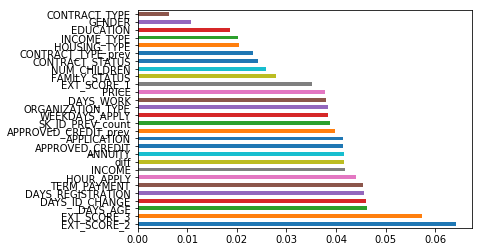

In [245]:
X = train_app2.iloc[:,2:30]  #independent columns
y = train_app2.iloc[:,1]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

In [247]:
train_app2.columns

Index(['LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
       'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'APPLICATION', 'APPROVED_CREDIT_prev', 'CONTRACT_STATUS',
       'CONTRACT_TYPE_prev', 'TERM_PAYMENT', 'SK_ID_PREV_count', 'diff'],
      dtype='object')

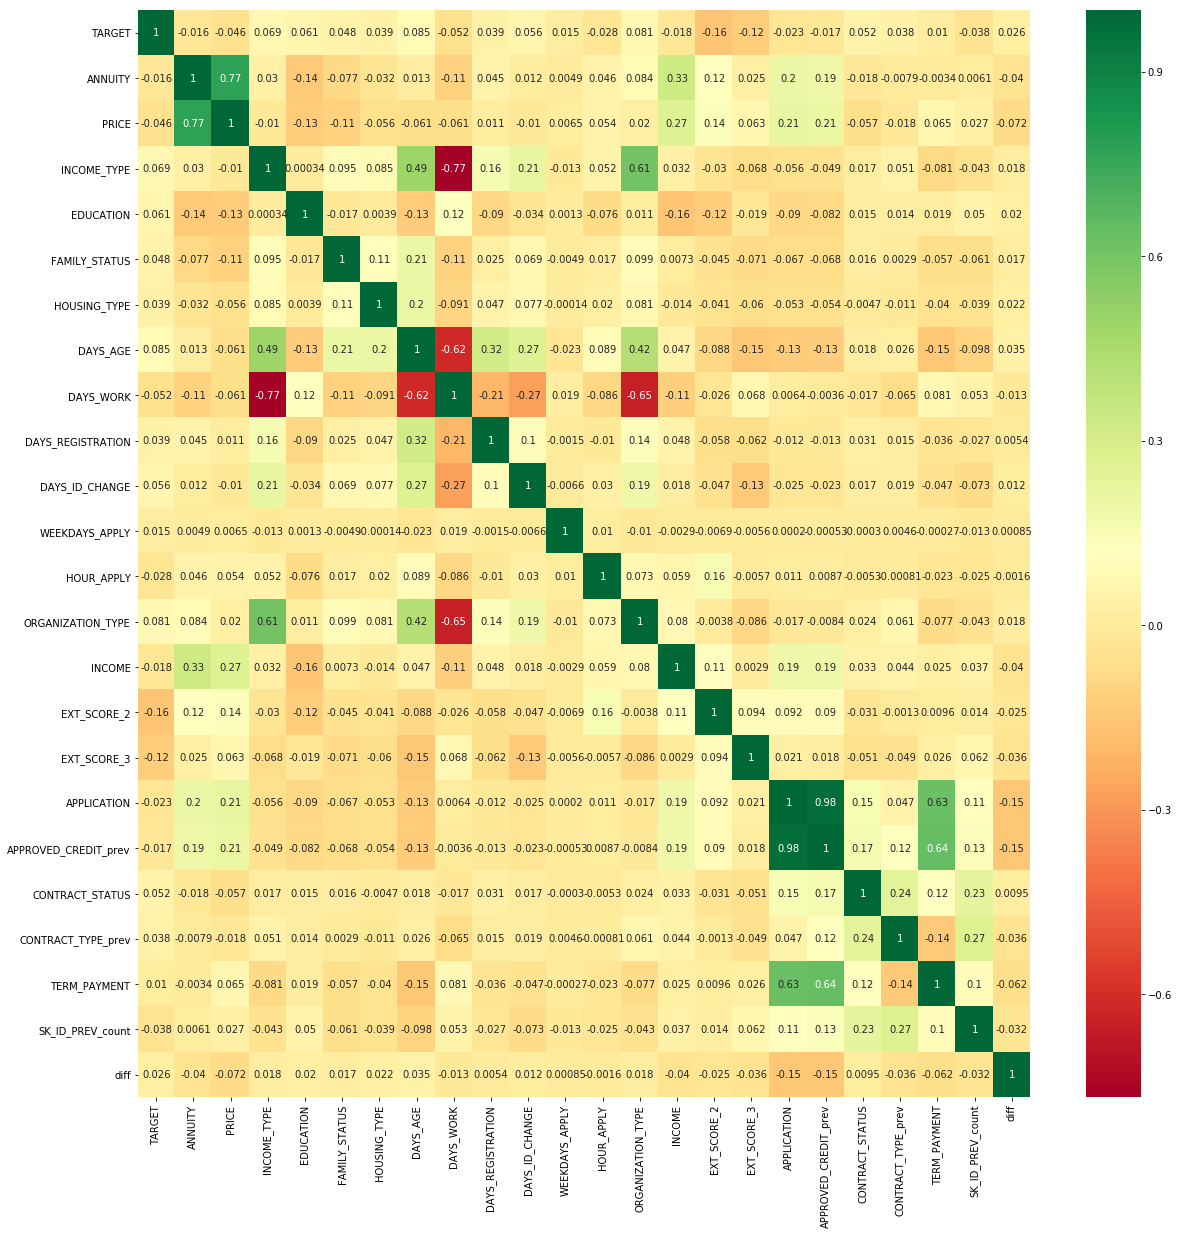

In [250]:
import seaborn as sns
X = train_app2.iloc[:,2:30]  #independent columns
y = train_app2.iloc[:,1]
train_app3 = train_app2[["TARGET",'ANNUITY', 'PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
       'ORGANIZATION_TYPE', 'INCOME', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'APPLICATION', 'APPROVED_CREDIT_prev', 'CONTRACT_STATUS',
       'CONTRACT_TYPE_prev', 'TERM_PAYMENT', 'SK_ID_PREV_count', 'diff']]
corrmat = train_app3.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_app3[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

In [ ]:
When we consider the variable ranking and correlation graph we can see the three most important variables are 
1.EXT_SCORE_2
2.EXT_SCORE_3
3.organisation_type

In [ ]:
#preparing test data 

In [ ]:
test_app =pd.read_csv("app_test.csv")

Extra_vals = pd.read_csv("Extravals.csv")

test_app2 = pd.merge(test_app,Extra_vals,on="LN_ID")

test_app2.head()

test_app2.drop('Unnamed: 0', axis=1, inplace=True)

#treating the categorical variables to be fed int the model

def categorical_treator(col,data):
    value_dict={}
    j=list(data[col].unique())
    for vals in j:
        print(vals)
        df2=data[data[col]==vals]
        m=df2.TARGET.mean()
        value_dict.update({vals :m} )
    data=data.replace({col: value_dict})    
    return data



test_app2=categorical_treator("CONTRACT_TYPE",test_app2)
test_app2=categorical_treator("GENDER",test_app2)
test_app2=categorical_treator("INCOME_TYPE",test_app2)


test_app2=categorical_treator("EDUCATION",test_app2)
test_app2=categorical_treator("FAMILY_STATUS",test_app2)
test_app2=categorical_treator("HOUSING_TYPE",test_app2)

test_app2=categorical_treator("WEEKDAYS_APPLY",test_app2)
test_app2=categorical_treator("ORGANIZATION_TYPE",test_app2)
test_app2=categorical_treator("CONTRACT_STATUS",test_app2)
test_app2=categorical_treator("CONTRACT_TYPE_prev",test_app2)
#df=categorical_treator("INCOME_TYPE",df)

test_app2.fillna(0,inplace=True)
test_app2.to_csv("test_app2.csv",index=False)

# Building the model

In [252]:
df_model_train = pd.read_csv("train_app2.csv")

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,APPLICATION,APPROVED_CREDIT_prev,CONTRACT_STATUS,CONTRACT_TYPE_prev,TERM_PAYMENT,SK_ID_PREV_count,diff
0,333538,0,0.056354,0.069801,1,67500.0,202500.0,10125.0,202500.0,0.098044,...,0.572805,0.608276,0.000000,21955.500,19759.500,0.073459,0.074041,4.0,1,0.000
1,406644,0,0.084502,0.069801,1,202500.0,976711.5,49869.0,873000.0,0.077410,...,0.655600,0.684298,0.000000,174600.000,212754.150,0.066413,0.095268,17.4,8,-9965.925
2,259130,0,0.084502,0.069801,0,180000.0,407520.0,25060.5,360000.0,0.051352,...,0.000000,0.580687,0.749022,148528.500,318550.500,0.102059,0.095268,8.0,3,0.000
3,411997,0,0.084502,0.105964,0,225000.0,808650.0,26086.5,675000.0,0.057766,...,0.000000,0.623740,0.710674,136906.875,149358.375,0.073459,0.095268,10.5,4,79958.700
4,241559,0,0.056354,0.105964,0,135000.0,180000.0,9000.0,180000.0,0.077410,...,0.175511,0.492994,0.085595,162619.500,170830.500,0.102059,0.074041,11.0,5,25020.720


In [267]:
df_model_train = pd.read_csv("train_app2.csv")

y = pd.DataFrame(df_model_train["TARGET"])

h=pd.DataFrame(df_model_train.drop('TARGET', axis=1))


import xgboost as xgb
print(xgb.__version__)

dtrain = xgb.DMatrix(h, label=y)

param = {
    'max_depth': 5,  
    'learning_rate': .1,  
    'objective':'reg:linear',
    'min_child_weight':100,
    'tree_method':'exact'
    
}



model = xgb.train(param, dtrain,num_boost_round=1000)

filename = 'model_xgb_cermati.sav'
pickle.dump(model, open(filename, 'wb'))

0.90
[05:07:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [268]:
df_model_test = pd.read_csv("test_app2.csv")
y = pd.DataFrame(df_model_test["TARGET"])

h=pd.DataFrame(df_model_test.drop('TARGET', axis=1))

import xgboost as xgb
print(xgb.__version__)

dtest = xgb.DMatrix(h, label=y)

filename = 'model_xgb_cermati.sav'
loaded_model = pickle.load(open(filename, 'rb'))

y_pred = loaded_model.predict(dtest,pred_leaf=False)

a = list(y_pred)


t=pd.DataFrame(a,columns=["pred"])

t["Actual_price"] = list(y["TARGET"])

t.to_csv("cermati_score.csv",index=False)


0.90
[05:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
#evaluating the score

In [270]:
scores = pd.read_csv("cermati_score.csv")

In [271]:
from sklearn.metrics import confusion_matrix

cut_off=0.5
scores.loc[(scores.pred <cut_off),'scores_class']=0
scores.loc[(scores.pred >cut_off),'scores_class']=1


predicted=scores["scores_class"]
Y_test =scores["Actual_price"]
matrix = confusion_matrix(Y_test, predicted)

matrix



array([[12729,    27],
       [ 1129,    25]])

In [272]:
from sklearn import metrics
print(metrics.accuracy_score(Y_test, predicted))


0.9168943206326384


In [273]:

print(metrics.recall_score(Y_test, predicted))

0.021663778162911613


In [275]:
print(metrics.precision_score(Y_test, predicted))



0.4807692307692308


In [276]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predicted)
metrics.auc(fpr, tpr)

0.5097735635875705